In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing


In [2]:
#Read data
normal = pd.read_csv("D:/Msc_Data_Science_1/Semester 2/Data science lab 1/LSTM data/SWaT_Dataset_Normal_v0 2.csv")#, nrows=1000)
normal = normal.drop(["Timestamp" , "Normal/Attack" ] , axis = 1)
print(normal.shape)
# Transform all columns into float64
for i in list(normal):   #the cols of the data
    normal[i]=normal[i].apply(lambda x: str(x).replace("," , "."))
normal = normal.astype(float)



(496800, 51)


In [3]:
normal.columns

Index(['FIT101', 'LIT101', 'MV101', 'P101', 'P102', 'AIT201', 'AIT202',
       'AIT203', 'FIT201', 'MV201', 'P201', 'P202', 'P203', 'P204', 'P205',
       'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302', 'MV303',
       'MV304', 'P301', 'P302', 'AIT401', 'AIT402', 'FIT401', 'LIT401', 'P401',
       'P402', 'P403', 'P404', 'UV401', 'AIT501', 'AIT502', 'AIT503', 'AIT504',
       'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501', 'P502', 'PIT501',
       'PIT502', 'PIT503', 'FIT601', 'P601', 'P602', 'P603'],
      dtype='object')

In [4]:
normal.drop(columns=[i for i in normal.columns if (normal[i].nunique()==1)], inplace=True)

In [5]:
normal.columns

Index(['FIT101', 'LIT101', 'MV101', 'P101', 'AIT201', 'AIT202', 'AIT203',
       'FIT201', 'MV201', 'P203', 'P205', 'DPIT301', 'FIT301', 'LIT301',
       'MV301', 'MV302', 'MV303', 'MV304', 'P301', 'P302', 'AIT401', 'AIT402',
       'FIT401', 'LIT401', 'P402', 'UV401', 'AIT501', 'AIT502', 'AIT503',
       'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501', 'PIT501',
       'PIT502', 'PIT503', 'FIT601', 'P602'],
      dtype='object')

In [30]:
all = ['FIT101', 'LIT101', 'MV101', 'P101', 'P102', 'AIT201', 'AIT202',
       'AIT203', 'FIT201', 'MV201', 'P201', 'P202', 'P203', 'P204', 'P205',
       'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302', 'MV303',
       'MV304', 'P301', 'P302', 'AIT401', 'AIT402', 'FIT401', 'LIT401', 'P401',
       'P402', 'P403', 'P404', 'UV401', 'AIT501', 'AIT502', 'AIT503', 'AIT504',
       'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501', 'P502', 'PIT501',
       'PIT502', 'PIT503', 'FIT601', 'P601', 'P602', 'P603']

subset= ['FIT101', 'LIT101', 'MV101', 'P101', 'AIT201', 'AIT202', 'AIT203',
       'FIT201', 'MV201', 'P203', 'P205', 'DPIT301', 'FIT301', 'LIT301',
       'MV301', 'MV302', 'MV303', 'MV304', 'P301', 'P302', 'AIT401', 'AIT402',
       'FIT401', 'LIT401', 'P402', 'UV401', 'AIT501', 'AIT502', 'AIT503',
       'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501', 'PIT501',
       'PIT502', 'PIT503', 'FIT601', 'P602']

print('the deleted cst features are: ')
for i in all:
    if not(i in subset):
        print(i)

the deleted cst features are: 
P102
P201
P202
P204
P206
P401
P403
P404
P502
P601
P603


In [6]:
#normalization
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x = normal.values
x_scaled = min_max_scaler.fit_transform(x)
normal = pd.DataFrame(x_scaled)

In [ ]:
#normal=np.array(normal)

In [ ]:
#the headers/features' names are not important for me that's why i don't care about saving them 
normal

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.899895,0.160292,1.0,1.0,0.000000,0.00000,0.019710,0.993304,1.0,1.0,...,0.000511,0.000565,0.000839,0.000000,0.0,0.004448,0.000000,0.005921,0.000147,0.0
1,0.895111,0.159845,1.0,1.0,0.000000,0.00000,0.019710,0.992222,1.0,1.0,...,0.000511,0.000565,0.000839,0.000000,0.0,0.004448,0.000000,0.005921,0.000147,0.0
2,0.888694,0.159533,1.0,1.0,0.000000,0.00000,0.019710,0.991707,1.0,1.0,...,0.000511,0.000565,0.000839,0.000000,0.0,0.004448,0.000000,0.005921,0.000147,0.0
3,0.884611,0.158819,1.0,1.0,0.000000,0.00000,0.019710,0.991398,1.0,1.0,...,0.000511,0.000565,0.000839,0.000000,0.0,0.004448,0.000000,0.005921,0.000147,0.0
4,0.883327,0.158372,1.0,1.0,0.003408,0.00000,0.019710,0.991398,1.0,1.0,...,0.000511,0.000565,0.000839,0.000000,0.0,0.004448,0.000000,0.005921,0.000147,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496795,0.896278,0.457619,1.0,1.0,0.627270,0.25853,0.103740,0.981663,1.0,1.0,...,0.982127,0.948909,0.962733,0.973530,1.0,0.945937,0.484716,0.945414,0.000073,0.0
496796,0.892078,0.457530,1.0,1.0,0.627270,0.25853,0.103740,0.981663,1.0,1.0,...,0.981325,0.940628,0.962733,0.973530,1.0,0.945937,0.484716,0.943629,0.000073,0.0
496797,0.886944,0.457440,1.0,1.0,0.627270,0.25853,0.104221,0.982693,1.0,1.0,...,0.980669,0.934324,0.962733,0.973530,1.0,0.945937,0.484716,0.943629,0.000073,0.0
496798,0.884611,0.457485,1.0,1.0,0.627270,0.25853,0.104221,0.982899,1.0,1.0,...,0.980669,0.934324,0.962733,0.973530,1.0,0.945937,0.449782,0.943629,0.000073,0.0


In [33]:
from BigWindow import *
splits= split_data(normal, n_splits=10)

In [34]:
splits

[             0         1    2    3         4         5         6         7   \
 0      0.899895  0.160292  1.0  1.0  0.000000  0.000000  0.019710  0.993304   
 1      0.895111  0.159845  1.0  1.0  0.000000  0.000000  0.019710  0.992222   
 2      0.888694  0.159533  1.0  1.0  0.000000  0.000000  0.019710  0.991707   
 3      0.884611  0.158819  1.0  1.0  0.000000  0.000000  0.019710  0.991398   
 4      0.883327  0.158372  1.0  1.0  0.003408  0.000000  0.019710  0.991398   
 ...         ...       ...  ...  ...       ...       ...       ...       ...   
 49675  0.885077  0.466636  1.0  1.0  0.495455  0.940988  0.708009  0.980581   
 49676  0.884494  0.466368  1.0  1.0  0.495455  0.940988  0.708586  0.980581   
 49677  0.884494  0.466323  1.0  1.0  0.495455  0.940988  0.710508  0.980581   
 49678  0.893945  0.466145  1.0  1.0  0.495455  0.942995  0.711278  0.980581   
 49679  0.913429  0.466189  1.0  1.0  0.495455  0.942995  0.712528  0.980581   
 
         8    9   ...        30       

In [ ]:
#let us now generate the windows  
import BigWindow
for i in range(10):
    feats, splits[i] = BigWindow.generate_datasets_for_training2(splits[i], window_size=20, stride=1) 

then length of the data is 49680
then length of the data is 49680
then length of the data is 49680
then length of the data is 49680
then length of the data is 49680
then length of the data is 49680
then length of the data is 49680
then length of the data is 49680
then length of the data is 49680
then length of the data is 49680


In [ ]:
#ensuring that the stride was 1
sum(splits[0][0][1] - splits[0][1][0])

0.0

In [43]:
print(f'the number of features that we have now is {len(splits[0][0][1])}')

the number of features that we have now is 40


# Note
in the prework, we have tried a stride of 10 and window as 12 

# Model

In [51]:
import importlib
importlib.reload(mymodel2)

<module 'mymodel2' from 'd:\\ds lab 1\\mymodel2.py'>

Physical devices cannot be modified after being initialized

Training on split 1/10
Epoch 1/20
2483/2483 [==============================] - 182s 67ms/step - loss: 0.1990 - val_loss: 0.0587
Epoch 2/20
2483/2483 [==============================] - 170s 68ms/step - loss: 0.0335 - val_loss: 0.0439
Epoch 3/20
2483/2483 [==============================] - 170s 69ms/step - loss: 0.0306 - val_loss: 0.0431
Epoch 4/20
2483/2483 [==============================] - 178s 72ms/step - loss: 0.0307 - val_loss: 0.0394
Epoch 5/20
2483/2483 [==============================] - 177s 71ms/step - loss: 0.0308 - val_loss: 0.0398
Epoch 6/20
2483/2483 [==============================] - 177s 71ms/step - loss: 0.0297 - val_loss: 0.0423
Epoch 7/20
2483/2483 [==============================] - 183s 74ms/step - loss: 0.0299 - val_loss: 0.0433
Epoch 7: early stopping
Model parameters saved to modelParametersSwat\model_split_1.h5

Split 1 completed in 1243.36s
Memory delta: 471.00 MiB
GPU memory delta: 1800.00 MiB
GPU load

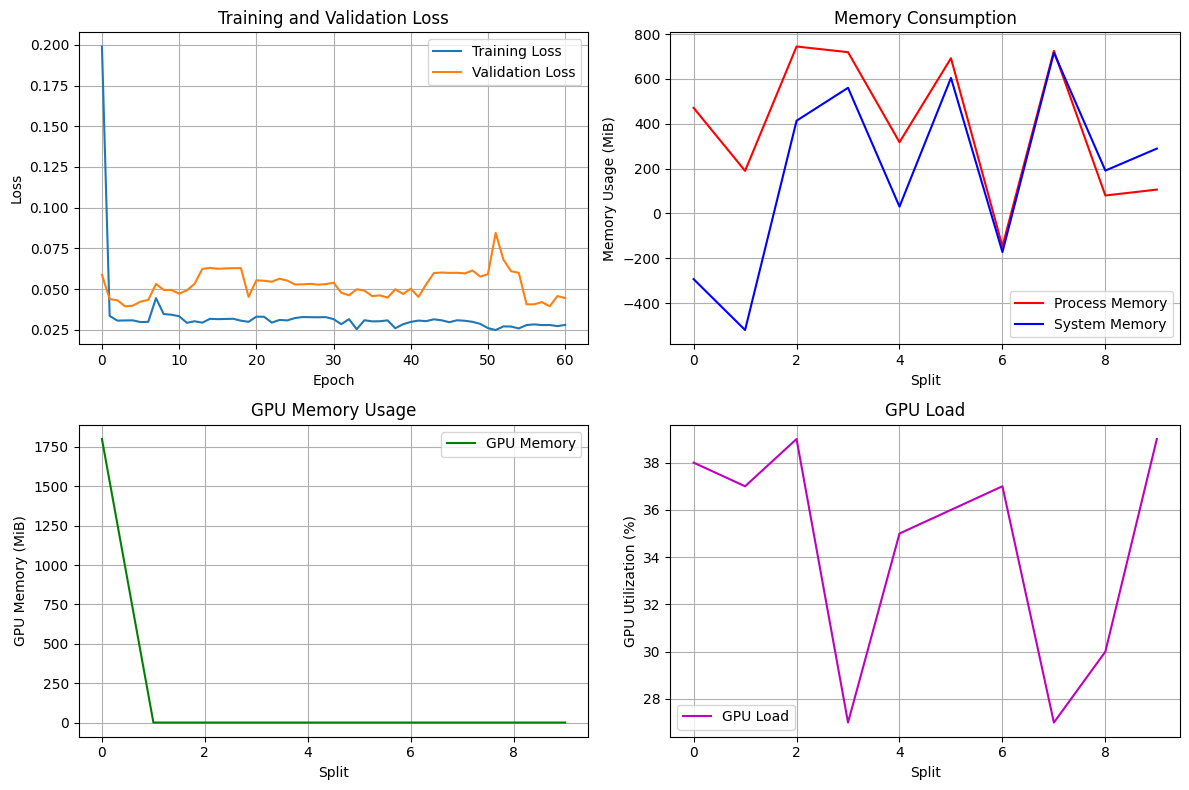

In [ ]:
import mymodel2
modelAllSplits = mymodel2.build_improved_model(windowsize=20,nboffeatures=40)
modelAllSplits, train_losses, val_losses = mymodel2.train_model_on_splits(splits, modelAllSplits, range(10) , epochs=20, batch_size=16, modelsavedname="final_stride1")

# Reconstruction Evaluation

3104/3104 [==============================] - 38s 12ms/step - loss: 0.0426
Evaluation Loss (MSE): 0.0425851084291935
1552/1552 [==============================] - 20s 11ms/step
Windowwise Mean Absolute Error (MAE): 0.1738547702323144
Windowwise Mean Squared Error (MSE): 0.041993955297917426


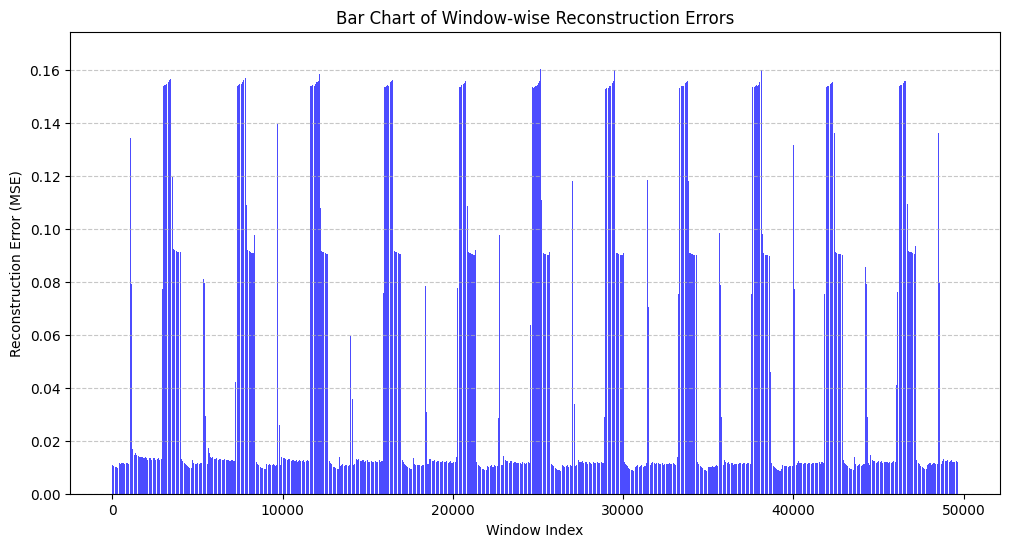

In [55]:
mae, mse, loss = mymodel2.evaluate_model_windowwise(modelAllSplits, splits[9], batch_size=16, window_size=20, stride=5)

# Loading the model 

In [1]:
import mymodel2

model = mymodel2.build_improved_model(windowsize=20,nboffeatures=40)
input_shape = (20,40)
model.build((None , *input_shape))
model.summary()
model.load_weights(f'final_stride1.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_1 (Bidirectional)   (None, 20, 80)            25920     
                                                                 
 dropout (Dropout)           (None, 20, 80)            0         
                                                                 
 layer_normalization (LayerN  (None, 20, 80)           160       
 ormalization)                                                   
                                                                 
 encoder_2 (Bidirectional)   (None, 20, 64)            28928     
                                                                 
 dropout_1 (Dropout)         (None, 20, 64)            0         
                                                                 
 layer_normalization_1 (Laye  (None, 20, 64)           128       
 rNormalization)                                        

In [2]:
import BigWindow
from sklearn.preprocessing import MinMaxScaler
import importlib
importlib.reload(BigWindow)
filePath= "D://Msc_Data_Science_1//Semester 2//Data science lab 1//LSTM data//SWaT_Dataset_Attack_v0 - Copy 2.csv"
# mixed_data = pd.read_csv(filePath)#, nrows=1000)
scaler = MinMaxScaler()
to_drop = [    "P102", "P201", "P202", "P204", "P206", 
    "P401", "P403", "P404", "P502", "P601", "P603"
]
mixed_data , labels = BigWindow.Process_mixed2(filePath, scaler=scaler,to_drop=to_drop)

d:\ds lab 1\BigWindow.py:141: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  labels= labels.replace({'Normal': 0, 'Attack': 1, 'A ttack':1})


In [4]:
mixed_data

,FIT101,LIT101,MV101,P101,AIT201,AIT202,AIT203,FIT201,MV201,P203,...,FIT501,FIT502,FIT503,FIT504,P501,PIT501,PIT502,PIT503,FIT601,P602
Timestamp,,,,,,,,,,,,,,,,,,,,,
28/12/2015 10:00:00 AM,0.879322,0.452962,1.0,1.0,0.942783,0.876785,0.436773,0.865044,1.0,1.0,...,0.982970,0.940678,0.991540,0.987464,1.0,0.985802,0.837398,0.987359,0.000071,0.0
28/12/2015 10:00:01 AM,0.886285,0.453015,1.0,1.0,0.942783,0.876785,0.436773,0.865044,1.0,1.0,...,0.982970,0.953861,0.991540,0.987464,1.0,0.985802,0.837398,0.987783,0.000071,0.0
28/12/2015 10:00:02 AM,0.901833,0.452962,1.0,1.0,0.942783,0.876081,0.436773,0.863956,1.0,1.0,...,0.982751,0.951224,0.991540,0.990135,1.0,0.985868,0.837398,0.987783,0.000071,0.0
28/12/2015 10:00:03 AM,0.918195,0.453122,1.0,1.0,0.942783,0.876081,0.436773,0.863956,1.0,1.0,...,0.982751,0.941808,0.991540,0.990135,1.0,0.985868,0.837398,0.987444,0.000071,0.0
28/12/2015 10:00:04 AM,0.930842,0.453816,1.0,1.0,0.942783,0.876081,0.436773,0.864228,1.0,1.0,...,0.982751,0.941808,0.991540,0.990135,1.0,0.985868,0.837398,0.986850,0.000071,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2/1/2016 2:59:55 PM,0.927477,0.448477,1.0,1.0,0.000643,0.965415,0.167313,0.870030,1.0,1.0,...,0.978804,0.947551,0.991022,0.983559,1.0,0.986980,0.439024,0.984305,0.000000,0.0
2/1/2016 2:59:56 PM,0.923532,0.449652,1.0,1.0,0.000643,0.965415,0.167313,0.870030,1.0,1.0,...,0.977708,0.935593,0.991022,0.983559,1.0,0.986653,0.439024,0.983796,0.000000,0.0
2/1/2016 2:59:57 PM,0.917150,0.450026,1.0,1.0,0.000643,0.965415,0.167313,0.870257,1.0,1.0,...,0.977708,0.933239,0.991022,0.983559,1.0,0.986653,0.439024,0.983796,0.000000,0.0


In [3]:
feats, mixed_data = BigWindow.generate_datasets_for_training2(mixed_data, window_size=20, stride=1) 

then length of the data is 449919


In [27]:
len(mixed_data)

449900

In [26]:
labels=labels.to_numpy()
labels= BigWindow.generate_datasets_for_labels(labels,window_size=20, stride=1)

In [27]:
true_labels=[]
for i in labels:
    if sum(i)>=1:
        true_labels.append(1)
    else:
        true_labels.append(0)

In [28]:
print(f'there is {sum(true_labels)} out of {len(true_labels)} the ratio is {sum(true_labels) / len(true_labels) }')

there is 55286 out of 449900 the ratio is 0.12288508557457213


In [ ]:
#del labels

In [26]:
len(true_labels)

449900

In [44]:
print(mixed_data.shape)
print(mixed_data.shape[0]//4)

(449900, 20, 40)
112475


In [35]:
part= mixed_data[:1000]

In [4]:
import mymodel2
importlib.reload(mymodel2)
Reconstruction_errs, flaggedAnomalies = mymodel2.find_anomalies_windowwise(model , mixed_data[:len(mixed_data)//4], threshold=0.09) 

7030/7030 [==============================] - 127s 17ms/step


In [62]:
# Clear GPU memory to prevent OOM issues
import gc
import tensorflow as tf
tf.keras.backend.clear_session()
gc.collect()

2873

In [10]:
import mymodel2
importlib.reload(mymodel2)
Reconstruction_errs2, flaggedAnomalies2 = mymodel2.find_anomalies_windowwise(model , mixed_data[len(mixed_data)//4:len(mixed_data)//2], threshold=0.09) 

7030/7030 [==============================] - 77s 11ms/step


In [12]:
Reconstruction_errs3, flaggedAnomalies3 = mymodel2.find_anomalies_windowwise(model , mixed_data[len(mixed_data)//2:3*len(mixed_data)//4], threshold=0.09) 

7030/7030 [==============================] - 92s 13ms/step


In [14]:
Reconstruction_errs4, flaggedAnomalies4 = mymodel2.find_anomalies_windowwise(model , mixed_data[3*len(mixed_data)//4:len(mixed_data)], threshold=0.09) 

7030/7030 [==============================] - 77s 11ms/step


In [16]:
type(flaggedAnomalies)

numpy.ndarray

In [18]:
import numpy as np
Reconstruction_errs=np.concatenate((Reconstruction_errs,Reconstruction_errs2, Reconstruction_errs3,Reconstruction_errs4 ), axis=0)

In [19]:
flaggedAnomalies=np.concatenate((flaggedAnomalies,flaggedAnomalies2, flaggedAnomalies3,flaggedAnomalies4 ), axis=0)

In [20]:
import pickle 
with open("flaggedanomalies.pkl", "wb") as f:
    pickle.dump(flaggedAnomalies, f)
with open("reconstructionerrors.pkl", "wb") as f:
    pickle.dump(Reconstruction_errs, f)


In [21]:
Reconstruction_errs.shape

(449900,)

In [29]:
importlib.reload(mymodel2)
threshold = mymodel2.find_best_threshold(reconstruction_errors=Reconstruction_errs, contamination=0.12288508557457213)


In [30]:
threshold

0.18834044579036274

In [37]:
flaggedAnomalies = (Reconstruction_errs > threshold).astype(int)

In [38]:
flaggedAnomalies

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
sum(flaggedAnomalies)

55285

In [52]:
flaggedAnomalies = flaggedAnomalies.astype(int) 

In [57]:
flaggedAnomalies=np.array(flaggedAnomalies)

In [60]:
true_labels=np.array(true_labels)

In [61]:
importlib.reload(mymodel2)
mymodel2.evaluate_performance(true_labels=true_labels, predictions=flaggedAnomalies)

{'TP': 35135,
 'FP': 20150,
 'TN': 374464,
 'FN': 20151,
 'Accuracy': 0.9104223160702378,
 'Precision': 0.6355250067830334,
 'Recall': 0.6355135115580798,
 'F1 Score': 0.6355192591185754}